In [1]:
import os
import random
from typing import Tuple

import imageio.v3 as iio
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

from prepare_data.utils import create_folder, get_random_image
from prepare_data.labels import get_box_cords
from prepare_data.visualize import add_labels_to_image, show_defects

In [2]:
path_to_data = r'../data/prepare_data'

image_path, label_path = get_random_image(path_to_data)
print(image_path)

../data/prepare_data/images/5 (222).jpg


{'0': [[0.607208, 0.789659, 0.024435, 0.321974], [0.788943, 0.782609, 0.023824, 0.037603]], '1': [[0.454184, 0.656874, 0.095907, 0.084606]]}


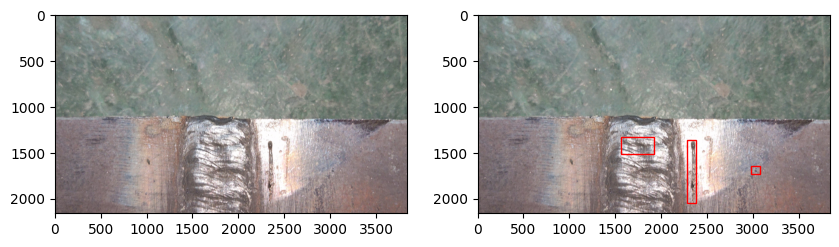

In [3]:
image = iio.imread(image_path)
defects = get_box_cords(label_path)
print(defects)

show_defects(image, defects)

## Generate markup images

In [6]:
data_dir = '../data/prepare_data'
path_to_save = '../data/generate_images'
create_folder(path_to_save)

In [7]:
color_map = {'0': 'purple',
             '1': 'orange',
             '2': 'green',
             '3': 'blue',
             '4': 'red'}

for root, dirs, files in os.walk(os.path.join(data_dir, 'images')):
    for file in files:
        path_to_image = os.path.join(root, file)
        path_to_label = os.path.join(data_dir, 'labels', file.replace('jpg', 'txt'))
      
        if file.replace('.jpg', '_label.jpg') in os.listdir(path_to_save):
            continue
            
        image = iio.imread(path_to_image)
        defects = get_box_cords(path_to_label)
      
        print(file, defects)
        add_labels_to_image(image, defects, os.path.join(path_to_save, file.replace('.jpg', '_label.jpg')), color_map)
        
        # break
    # break

5 (126).jpg {'2': [[0.479841, 0.447121, 0.084911, 0.116334]]}
5 (105).jpg {'1': [[0.500611, 0.360752, 0.040929, 0.047004]]}
7 (245).jpg {'2': [[0.513134, 0.482374, 0.124618, 0.057579]], '1': [[0.875076, 0.543478, 0.043372, 0.057579]], '0': [[0.284973, 0.673325, 0.022602, 0.025852], [0.301161, 0.753819, 0.017104, 0.027027], [0.267563, 0.947709, 0.030544, 0.045828], [0.900122, 0.418331, 0.029933, 0.037603]]}
8 (95).jpg {'2': [[0.504887, 0.567568, 0.274282, 0.117509], [0.543677, 0.087544, 0.161271, 0.06463]]}
5 (101).jpg {}
5 (64).jpg {}
7 (63).jpg {'2': [[0.284973, 0.471798, 0.110568, 0.123384]], '1': [[0.848809, 0.39483, 0.124007, 0.042303]], '0': [[0.467318, 0.297297, 0.163714, 0.094007]]}
8 (76).jpg {'2': [[0.508858, 0.222679, 0.274893, 0.135135], [0.507636, 0.553467, 0.25901, 0.115159]], '3': [[0.712584, 0.548766, 0.104459, 0.124559], [0.720831, 0.220329, 0.10507, 0.055229]]}
5 (79).jpg {'1': [[0.453879, 0.959459, 0.062309, 0.07168]]}
8 (32).jpg {'2': [[0.514966, 0.125147, 0.246793, 

## Calculate stats

In [11]:
def calc_count(cords, label):
    if label not in cords:
        return 0
    
    return len(cords[label])
    

In [25]:
data = pd.DataFrame(columns=['path', 'name', 'video_id', 'frame_id', 'pat0', 'pat1', 'pat2', 'pat3', 'pat4'])
for root, dirs, files in os.walk(os.path.join(data_dir, 'labels')):
    for file in files:
        if 'clas' in file:
            continue
        path_to_label = os.path.join(root, file)
        defects = get_box_cords(path_to_label)
        
        name = file.split('.')[0]

        pattern_before_parentheses = r'(\d+)\s*\('
        video_id = re.search(pattern_before_parentheses, name).group(1)

        pattern_inside_parentheses = r'\((\d+)\)'
        frame_id = re.search(pattern_inside_parentheses, name).group(1)
        
        data = pd.concat((data, pd.DataFrame({'path': path_to_label,
                                              'name': name,
                                              'video_id': video_id,
                                              'frame_id': frame_id,
                                              'pat0': calc_count(defects, '0'),
                                              'pat1': calc_count(defects, '1'),
                                              'pat2': calc_count(defects, '2'),
                                              'pat3': calc_count(defects, '3'),
                                              'pat4': calc_count(defects, '4')}, index=[0])), ignore_index=True)

In [26]:
data

,path,name,video_id,frame_id,pat0,pat1,pat2,pat3,pat4
0,../data/prepare_data/labels/7 (27).txt,7 (27),7,27,5,1,0,2,0
1,../data/prepare_data/labels/11 (1).txt,11 (1),11,1,0,0,1,0,0
2,../data/prepare_data/labels/7 (150).txt,7 (150),7,150,6,1,3,0,1
3,../data/prepare_data/labels/8 (64).txt,8 (64),8,64,0,0,2,0,0
4,../data/prepare_data/labels/8 (68).txt,8 (68),8,68,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
1157,../data/prepare_data/labels/6 (40).txt,6 (40),6,40,0,0,0,1,0
1158,../data/prepare_data/labels/3 (16).txt,3 (16),3,16,0,0,0,0,0
1159,../data/prepare_data/labels/7 (246).txt,7 (246),7,246,4,1,1,0,0
1160,../data/prepare_data/labels/6 (12).txt,6 (12),6,12,0,0,3,0,0


In [33]:
data['video_id'].value_counts()

video_id
7     261
5     224
4     152
8     119
6     111
11     82
9      73
12     63
3      51
2      13
1      13
Name: count, dtype: int64

In [31]:
data['pat0'].sum()

1482

In [27]:
data['pat1'].sum()

388

In [28]:
data['pat2'].sum()

1063

In [29]:
data['pat3'].sum()

287

In [30]:
data['pat4'].sum()

205